In [51]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def update_w_b (x , y , w , b , alpha):
    # f(x) = wx + b
    dl_dw = 0.0
    dl_db = 0.0
    N = len(x)
    for i in range(N):
        dl_dw += -2*x[i]*(y[i] - (w*x[i] + b))
        dl_db += -2*(y[i] - (w*x[i] + b))

    # update w and b
    w = w - (1/float(N))*dl_dw*alpha
    b = b - (1/float(N))*dl_db*alpha

    return w, b



In [59]:
def predict(x, w, b):
    predicted_y = w*x + b
    return predicted_y

In [75]:
def avg_loss(x, y, w, b):
    N = len(x) 
    lost = 0
    predicted_value = predict(x,w,b)
    for i in range(N):
        lost += (y[i] - predicted_value[i]) ** 2
    return (lost / float(N))

In [76]:
def train (x , y, w, b, alpha, epochs):
    for i in range(epochs):
        w , b = update_w_b(x,y,w,b,alpha)
        if i % 1000 == 0 :
            print("epoch:", i , "loss: ", avg_loss(x, y, w, b))
    return w , b

In [67]:
def train_library(x, y):    
    model = LinearRegression().fit(x,y)
    return model


In [43]:
from sklearn.model_selection import train_test_split
# 1 shuffles the dataset using a pseudorandom number generator
# 2 took the last 25% of the data as a test set
# random_state = 0 makes outcome deterministic, so this funtion always have the same outcome.
diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split (diabetes.data[:, np.newaxis, 2] , diabetes.target,random_state = 0)

In [81]:

w, b = train(X_train[:,0], y_train, 0.0, 0.0, 0.1, 15000)


epoch: 0 loss:  21022.76838894582
epoch: 1000 loss:  4757.133816628191
epoch: 2000 loss:  4176.67134871807
epoch: 3000 loss:  3951.2906140901405
epoch: 4000 loss:  3863.7802609672003
epoch: 5000 loss:  3829.801926854733
epoch: 6000 loss:  3816.6088914268407
epoch: 7000 loss:  3811.4863276417673
epoch: 8000 loss:  3809.4973494512983
epoch: 9000 loss:  3808.7250732224184
epoch: 10000 loss:  3808.4252154479286
epoch: 11000 loss:  3808.308787307895
epoch: 12000 loss:  3808.263580836873
epoch: 13000 loss:  3808.2460281642857
epoch: 14000 loss:  3808.2392128498436


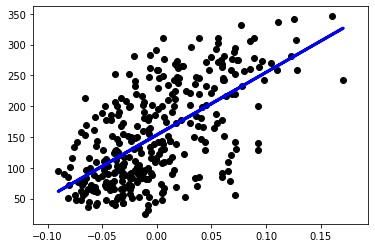

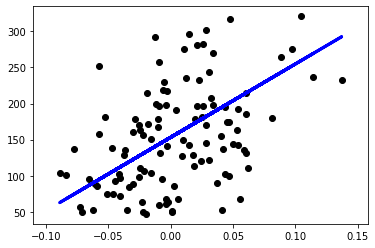

In [85]:
# Plot outputs
plt.scatter(X_train, y_train,  color='black')
y_predicted = predict(X_train, w, b)
plt.plot(X_train, y_predicted, color='blue', linewidth=3)
plt.show()

plt.scatter(X_test, y_test,  color='black')
y_predicted = predict(X_test, w, b)
plt.plot(X_test, y_predicted, color='blue', linewidth=3)
plt.show()

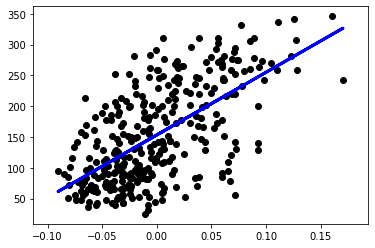

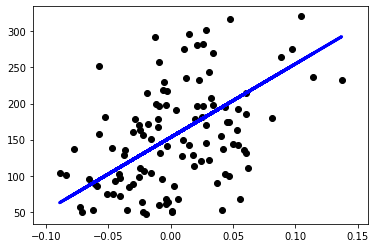

In [86]:
model = train_library(X_train, y_train)
y_predicted = model.predict(X_train)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, y_predicted, color='blue', linewidth=3)
plt.show()


y_predicted = model.predict(X_test)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predicted, color='blue', linewidth=3)
plt.show()

